### anaconda prompt  에 명령어 입력

* conda install afinn

In [2]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 감성사전 - Afinn

In [46]:
#data\\aclimdb\\train\\neg\\*.txt
pos_review=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[50]

In [47]:
f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

In [48]:
afinn = Afinn()

In [49]:
afinn.score(lines1) # -15 ~ 20

34.0

In [50]:
neg_review=(glob.glob("data\\aclimdb\\train\\neg\\*.txt"))[20]

In [51]:
f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

In [52]:
afinn.score(lines2)

-4.0

In [15]:
# 감성사전 - NRC

In [53]:
NRC=pd.read_csv('data\\nrc.txt',engine="python",header=None,sep="\t")
NRC.head()

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [54]:
NRC.iloc[:,1].value_counts()

anger           14182
anticipation    14182
trust           14182
positive        14182
surprise        14182
negative        14182
joy             14182
sadness         14182
fear            14182
disgust         14182
Name: 1, dtype: int64

In [55]:
NRC[:10]

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [56]:
NRC = NRC[(NRC != 0).all(1)]

In [57]:
NRC[NRC[0] == 'happy']

,0,1,2
57871,happy,anticipation,1
57874,happy,joy,1
57876,happy,positive,1
57879,happy,trust,1


In [58]:
NRC[NRC[0] == 'disaster']

,0,1,2
36260,disaster,anger,1
36262,disaster,disgust,1
36263,disaster,fear,1
36265,disaster,negative,1
36267,disaster,sadness,1
36268,disaster,surprise,1


In [59]:
NRC=NRC.reset_index(drop=True)

In [60]:
tokenizer = RegexpTokenizer('[\w]+')

In [62]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [63]:
p_stemmer = PorterStemmer()


In [64]:
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [65]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]

In [66]:
match_words

['bad',
 'bother',
 'talk',
 'guess',
 'public',
 'hit',
 'general',
 'public',
 'success',
 'special',
 'capture',
 'ship',
 'accurate',
 'actual',
 'ship',
 'real',
 'goodness',
 'break',
 'thought',
 'time',
 'hearing',
 'word',
 'mouth',
 'good',
 'decent',
 'worth',
 'hulk',
 'money',
 'cover',
 'gigantic',
 'budget',
 'money',
 'budget',
 'love',
 'romance',
 'romance',
 'sweet',
 'real',
 'star',
 'gigantic',
 'ship',
 'including',
 'job',
 'break']

In [151]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [67]:
emotion = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion.append(j)
emotion

['anger',
 'disgust',
 'fear',
 'negative',
 'sadness',
 'negative',
 'positive',
 'surprise',
 'anticipation',
 'positive',
 'anger',
 'negative',
 'positive',
 'trust',
 'anticipation',
 'positive',
 'anticipation',
 'joy',
 'positive',
 'joy',
 'positive',
 'negative',
 'anticipation',
 'positive',
 'trust',
 'positive',
 'anticipation',
 'positive',
 'trust',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'surprise',
 'anticipation',
 'anticipation',
 'fear',
 'negative',
 'positive',
 'trust',
 'surprise',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'positive',
 'positive',
 'disgust',
 'anger',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'trust',
 'positive',
 'trust',
 'anger',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'trust',
 'joy',
 'positive',
 'anticipation',
 'fear',
 'joy',
 'positive',
 'sadness',
 'surprise',
 'trust',
 'anticipation',
 'fear',
 'joy',
 'positive',
 'sadness',
 'surprise',
 'trust',

In [68]:
sentiment_result1=pd.Series(emotion).value_counts()

In [69]:
sentiment_result1

positive        26
anticipation    16
trust           16
surprise        11
joy             11
negative         5
fear             4
anger            4
sadness          3
disgust          2
dtype: int64

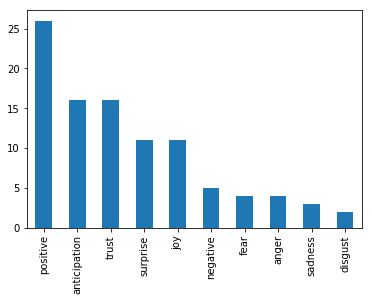

In [72]:
sentiment_result1.plot.bar()


In [116]:
def emotionf(s1):

# 감정점수를 계산하는 함수 작성
    emot_score = 0
    for j in s1:
        if j in ['positive','anticipation','trust','joy','surprise']:
            emot_score += 1
        else:
            emot_score -= 1
    
    return emot_score

In [117]:
emotion = ['positive','joy']
emotionf(emotion)

2

In [76]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [77]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]


In [78]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [79]:
emotion1 = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion1.append(j)
emotion1

['positive',
 'anger',
 'disgust',
 'fear',
 'negative',
 'sadness',
 'disgust',
 'negative']

In [80]:
sentiment_result2=pd.Series(emotion1).value_counts()
sentiment_result2

disgust     2
negative    2
positive    1
anger       1
sadness     1
fear        1
dtype: int64

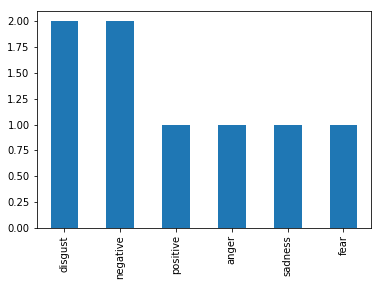

In [81]:
sentiment_result2.plot.bar()


In [82]:
emotionf(emotion1)

-1

In [ ]:
# machine learning

In [122]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
pos_review=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[:20]

In [125]:
# f = open(pos_review, 'r')
# pos_review = f.readlines()[0]
# f.close()

In [126]:
lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

In [127]:
len(lines_pos)

20

In [133]:
lines_pos

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

In [88]:
# f = open(pos_review, 'r')
# pos_lines = f.readlines()[0]
# f.close()

In [128]:
neg_review=(glob.glob("data\\aclimdb\\train\\neg\\*.txt"))[:20]

In [90]:
# f = open(neg_review, 'r')
# neg_review = f.readlines()[0]
# f.close()

In [129]:

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

In [130]:
len(lines_neg)

20

In [134]:
total_text = lines_neg + lines_pos

In [135]:
total_text

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [136]:
len(total_text)

40

In [137]:
total_text[25]

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [308]:
# x = np.array(["pos", "neg"])
# class_Index = np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)

In [138]:
neg_index = np.repeat('neg', 20)
neg_index = list(neg_index)

In [139]:
 pos_index = np.repeat('pos', 20)
pos_index = list(pos_index)

In [140]:
class_index = neg_index+pos_index

In [141]:
print(class_index)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']


In [142]:
stop_words = stopwords.words('english')

In [143]:
vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)

In [405]:
# df(document frequency) - 전체 문서에서 특정 단어를 포함하는 문서의 빈도
# tf(term frequency) - 특정 단어가 하나의 문서에서 나타난 빈도
# tfidf = tf/df (특정단어가 특정 문서에서의 중요도)

In [149]:
X_train_vectorized = vect.transform(total_text)

In [152]:
# X_train_vectorized.index = class_Index

import pandas as pd
pd.DataFrame(X_train_vectorized.toarray(), columns = vect.get_feature_names()).head()

,06,10,108,14,17,1940,1950,1959,1970,1972,...,year,years,yes,yet,york,yorker,young,youth,youthful,zsigmond
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.136298
1,0.0,0.0,0.074836,0.0,0.0,0.0,0.0,0.0,0.037418,0.037418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143903,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [153]:
# Logistic 예측모델 작성
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logmodel = LogisticRegression()
logmodel.fit(X_train_vectorized, class_index)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
pos_review_test=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[51]

In [155]:
test = []
f = open(pos_review_test, 'r')
test.append(f.readlines()[0])
f.close()

In [156]:
prediction = logmodel.predict(vect.transform(test))
prediction

array(['pos'], dtype='<U3')

In [148]:
# DecisionTree 감성분석 모델 예측

In [165]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train_vectorized, class_index)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
prediction = treemodel.predict(vect.transform(test))
prediction

array(['neg'], dtype='<U3')